# XAI - Explaining Models

## Imports

In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import pickle
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
model_name = "xgb"
with open("models/" + model_name + ".pkl", "rb") as file:
    model = pickle.load(file)
    
feature_names = model.feature_names_in_

In [21]:
data = pd.read_csv('data/high_diamond_ranked_10min.csv')

train_val, test = train_test_split(data, test_size=0.2, random_state=42)
train, val = train_test_split(train_val, test_size=0.3, random_state=42)

train_X = train.drop(columns=['gameId', 'blueWins'])
train_y = pd.DataFrame(train['blueWins'])

val_X = val.drop(columns=['gameId', 'blueWins'])
val_y = pd.DataFrame(val['blueWins'])

test_X = test.drop(columns=['gameId', 'blueWins'])
test_y = pd.DataFrame(test['blueWins'])

scaler = preprocessing.StandardScaler()
train_X_scaled = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
val_X_scaled = pd.DataFrame(scaler.transform(val_X), columns=val_X.columns)
test_X_scaled = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

## Extrinsic Models

### Shapley Values

### KernelExplainer

In [4]:
# # print the JS visualization code to the notebook
# shap.initjs()

# # use Kernel SHAP to explain test set predictions
# explainer = shap.KernelExplainer(model.predict_proba, train_X_scaled, feature_names=feature_names, link="logit")
# shap_values = explainer.shap_values(val_X_scaled, nsamples=100)

# # plot the SHAP values for the Setosa output of the first instance
# shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], val_X_scaled.iloc[0,:], link="logit")

### Tree Models

#### TreeExplainer

In [22]:
# use Kernel SHAP to explain test set predictions
explainer = shap.TreeExplainer(model, train_X_scaled, model_output="raw")
shap_values = explainer.shap_values(val_X_scaled)

# plot the SHAP values for the Setosa output of the first instance
shap.force_plot(explainer.expected_value, shap_values[0,:], val_X_scaled.iloc[0,:])

[23:24:27] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [6]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], val_X_scaled.iloc[:1000,:])

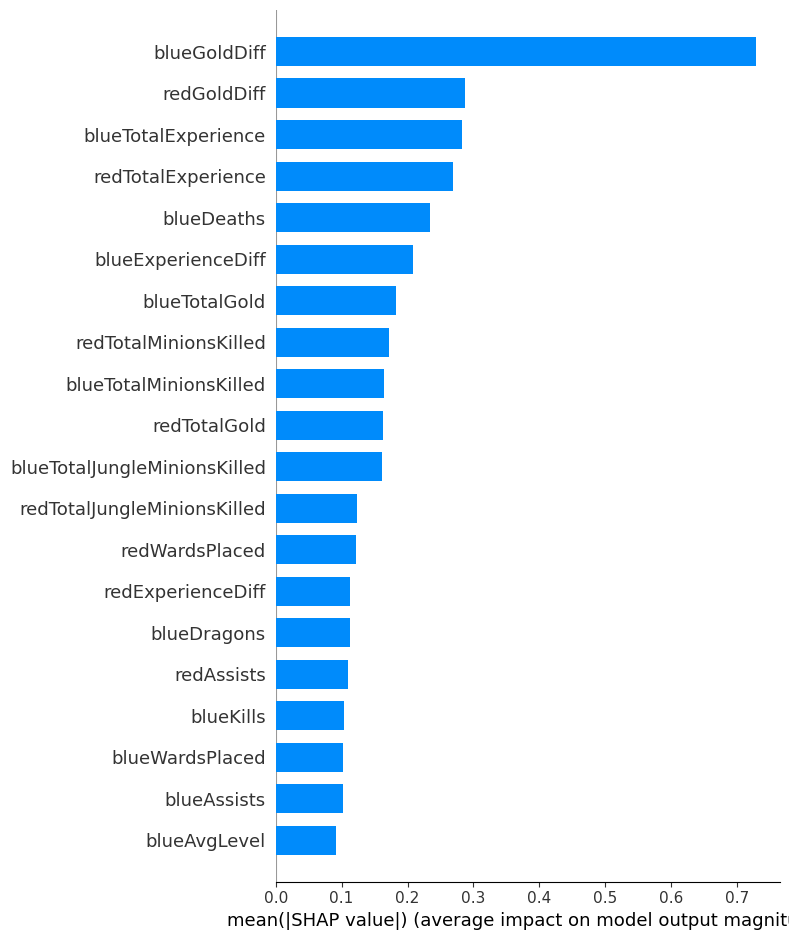

In [7]:
shap.summary_plot(shap_values, val_X_scaled, plot_type="bar")

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


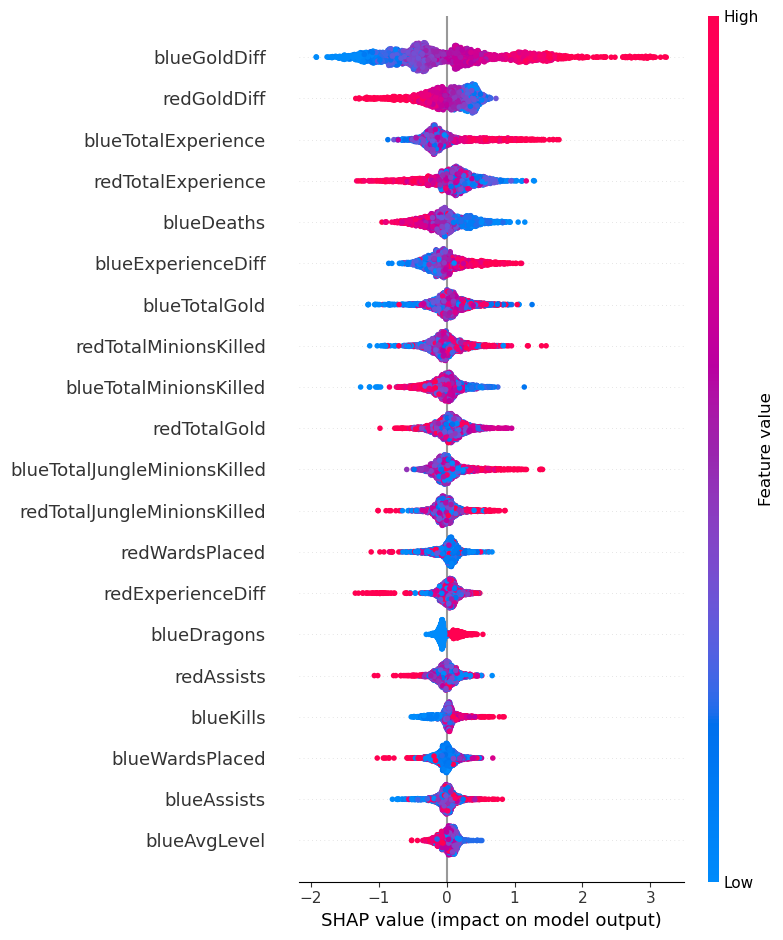

In [8]:
shap.summary_plot(shap_values, val_X_scaled)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


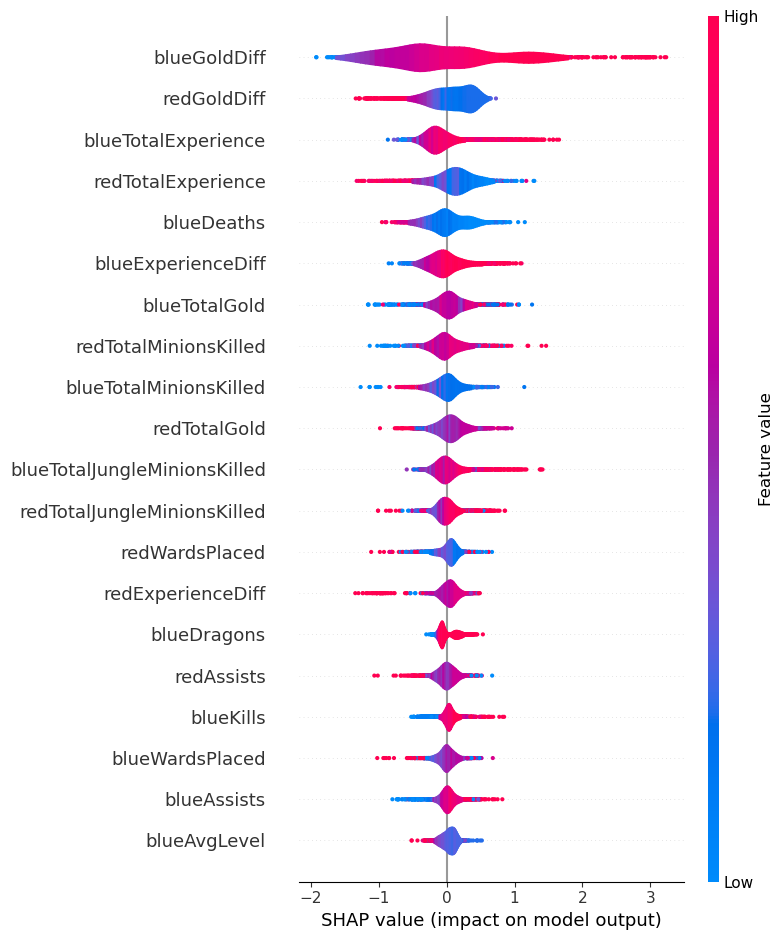

In [23]:
shap.summary_plot(shap_values, val_X_scaled, plot_type="violin")

In [9]:
# for name in val_X_scaled.columns:
    # shap.dependence_plot(name, shap_values, val_X_scaled, display_features=val_X_scaled)

#### Explainer

[23:46:37] WARNING: C:\b\abs_0fh_d4x2ng\croot\xgboost-split_1713973188995\work\cpp_src\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


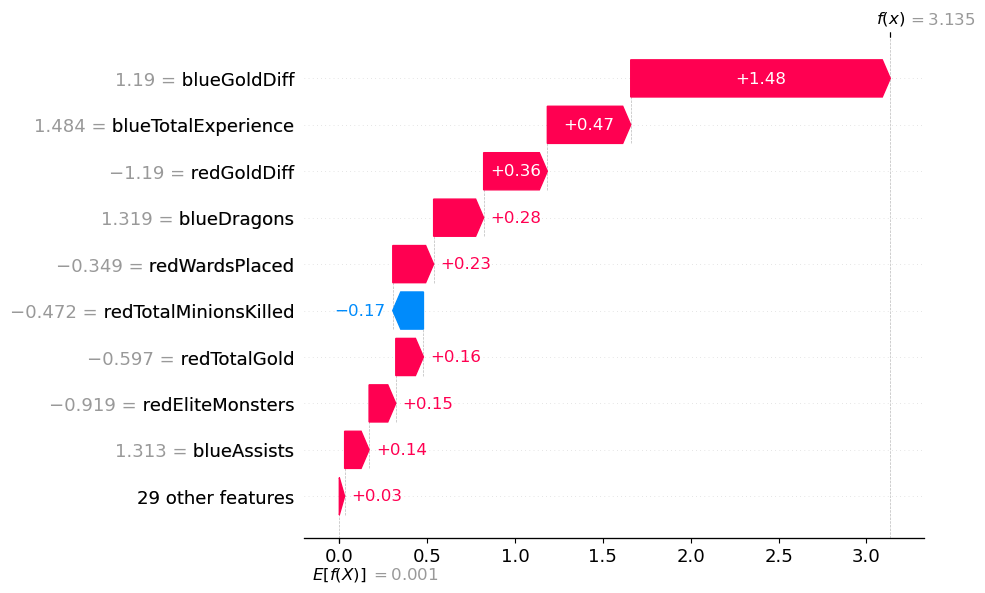

In [78]:
# print the JS visualization code to the notebook
shap.initjs()

# use Kernel SHAP to explain test set predictions
explainer = shap.Explainer(model)
shap_values = explainer(train_X_scaled)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [11]:
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [16]:
# visualize all the training set predictions
shap.plots.force(shap_values[:200])

In [79]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "blueGoldDiff"])

In [13]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:, "blueGoldDiff"], color=shap_values)

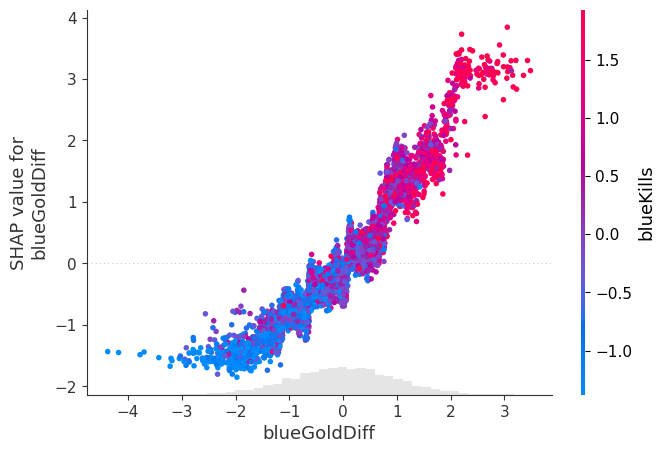

In [81]:
# color using another feature
shap.plots.scatter(shap_values[:, "blueGoldDiff"], color=shap_values[:, "blueKills"])

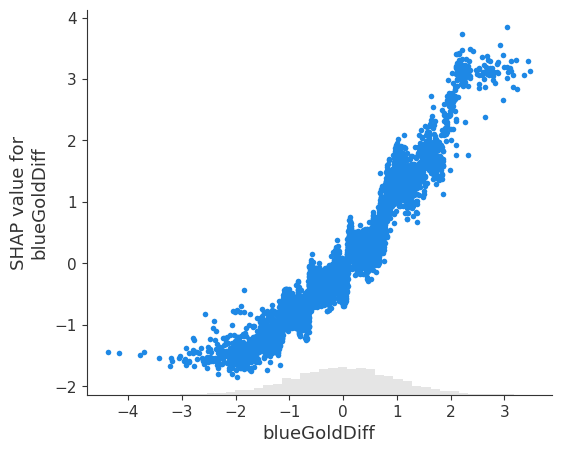

In [82]:
# global importance of a feature across the entire dataset (mean)
shap.plots.scatter(shap_values[:, shap_values.abs.mean(0).argsort[-1]])

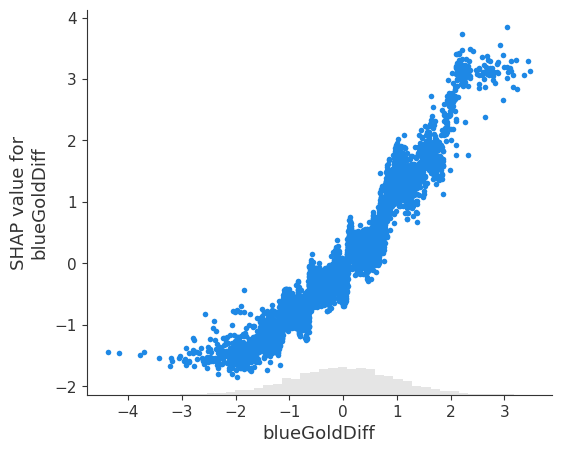

In [83]:
# global importance of a feature across the entire dataset (max)
shap.plots.scatter(shap_values[:, shap_values.abs.max(0).argsort[-1]])

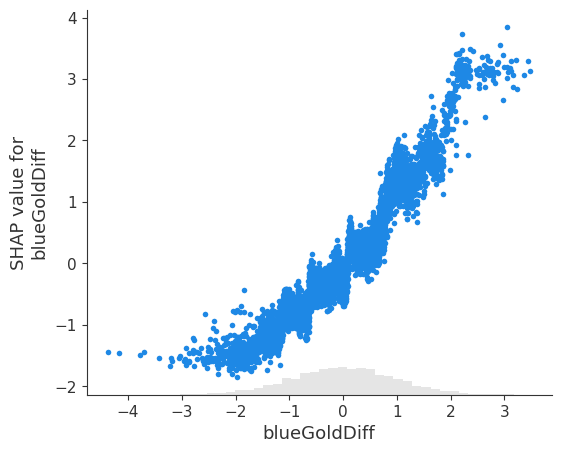

In [84]:
# global importance of a feature across the entire dataset (95th percentile)
shap.plots.scatter(shap_values[:, shap_values.abs.percentile(95, 0).argsort[-1]])

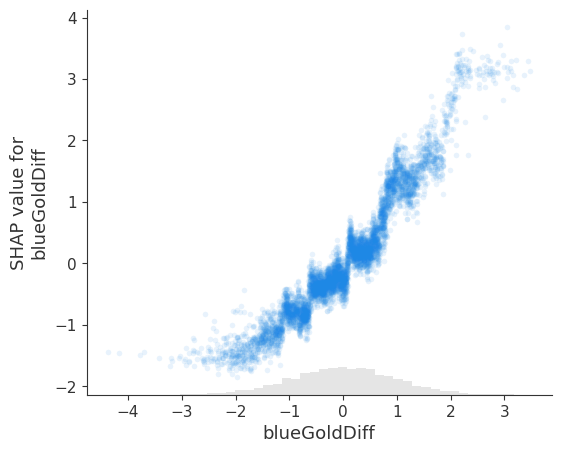

In [85]:
# transparency can help reveal dense vs. sparse areas of the scatter plot
shap.plots.scatter(shap_values[:, "blueGoldDiff"], alpha=0.1)

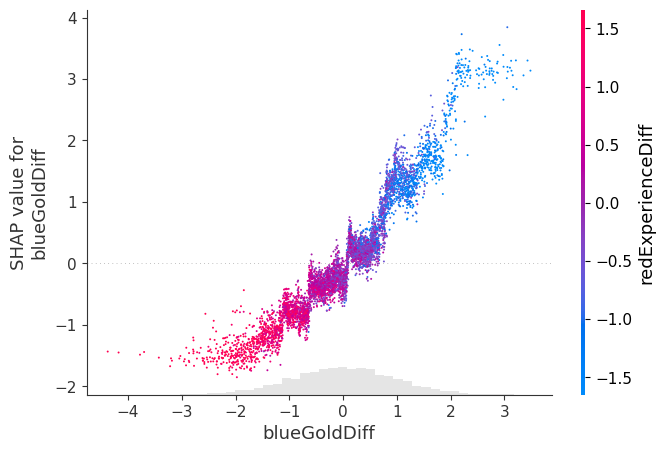

In [87]:
# for categorical (or binned) data adding a small amount of x-jitter makes
# thin columns of dots more readable
shap.plots.scatter(shap_values[:, "blueGoldDiff"], dot_size=2, x_jitter=1, color=shap_values)

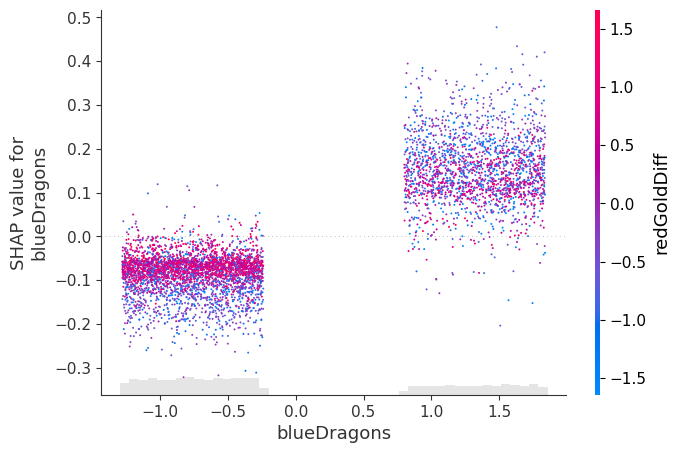

In [88]:
# for categorical (or binned) data adding a small amount of x-jitter makes
# thin columns of dots more readable
shap.plots.scatter(
    shap_values[:, "blueDragons"], dot_size=2, x_jitter=0.5, color=shap_values
)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


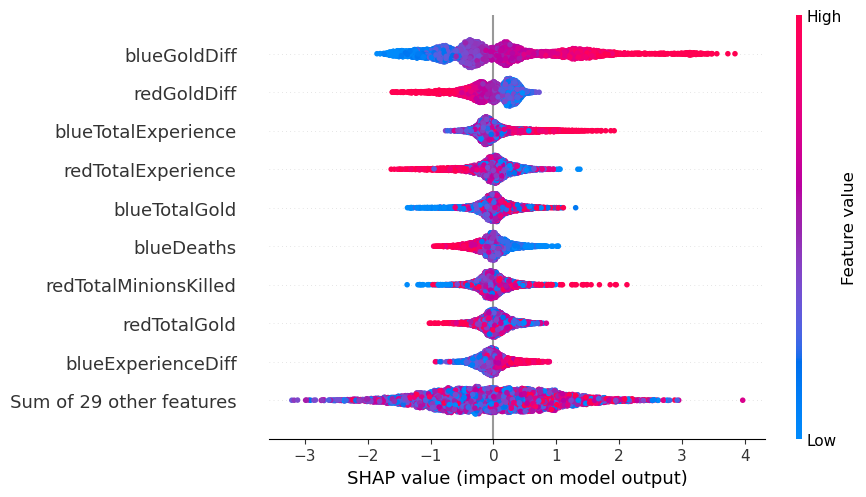

In [14]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

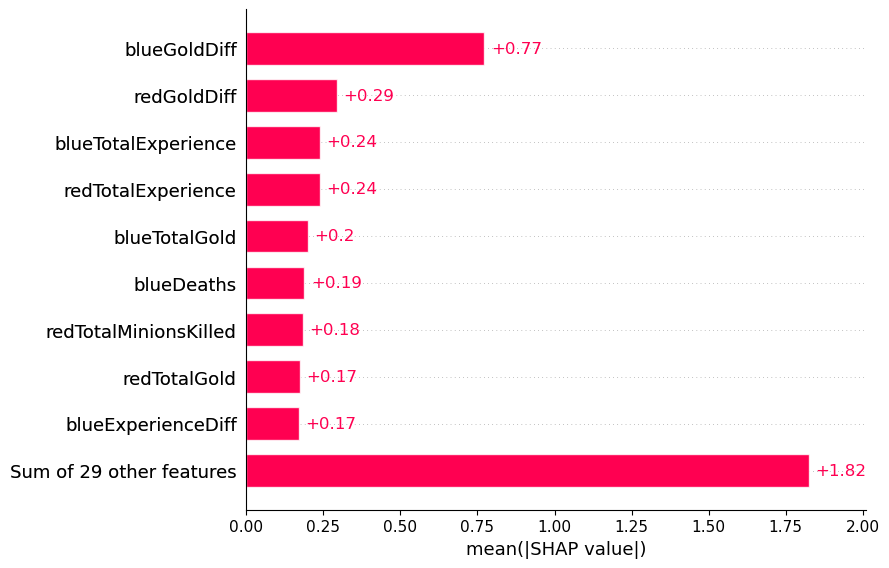

In [18]:
shap.plots.bar(shap_values, max_display=10)

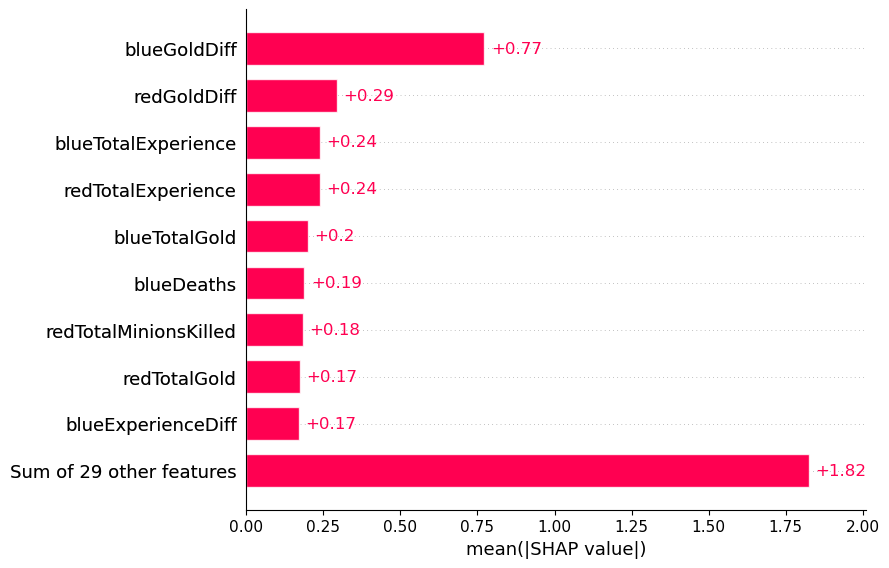

In [28]:
# Absolute value of SHAP values
shap.plots.bar(shap_values.abs.mean(0))

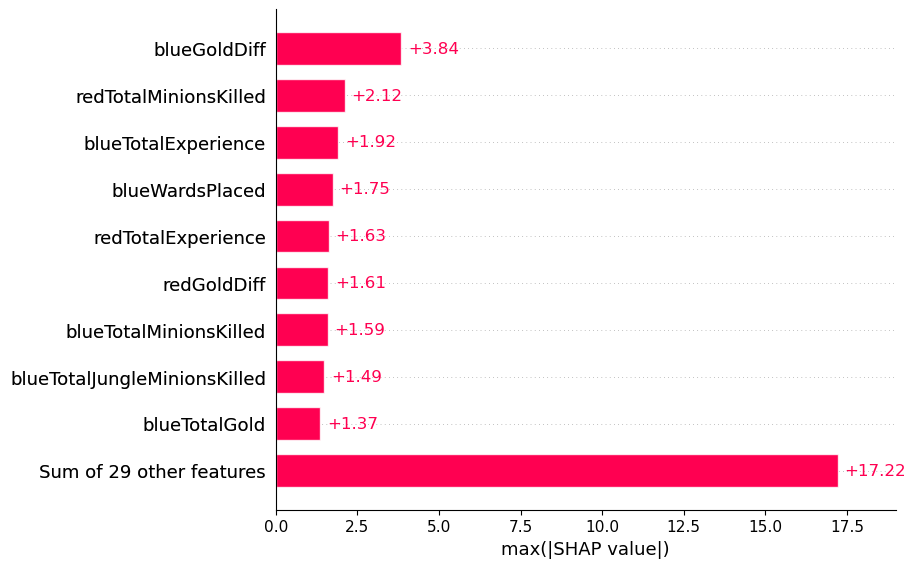

In [27]:
# Max value of SHAP values
shap.plots.bar(shap_values.abs.max(0))

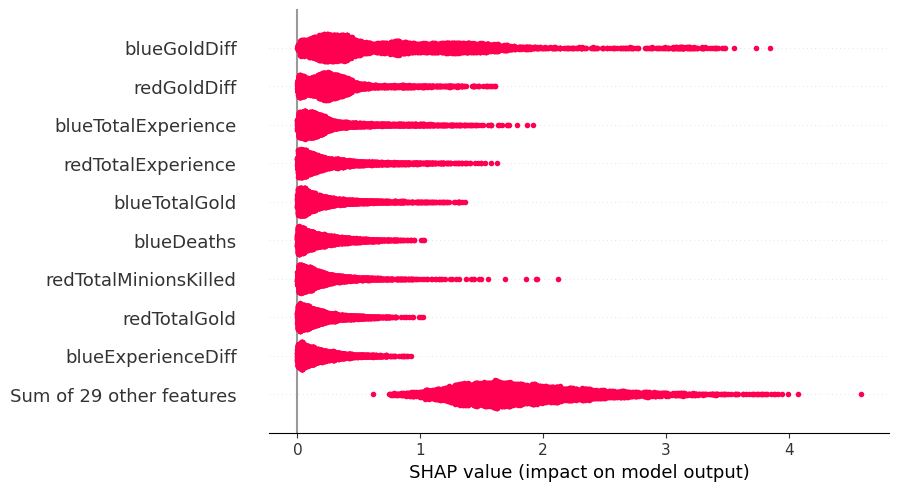

In [25]:
# Absolute value of SHAP values
shap.plots.beeswarm(shap_values.abs, color="shap_red")

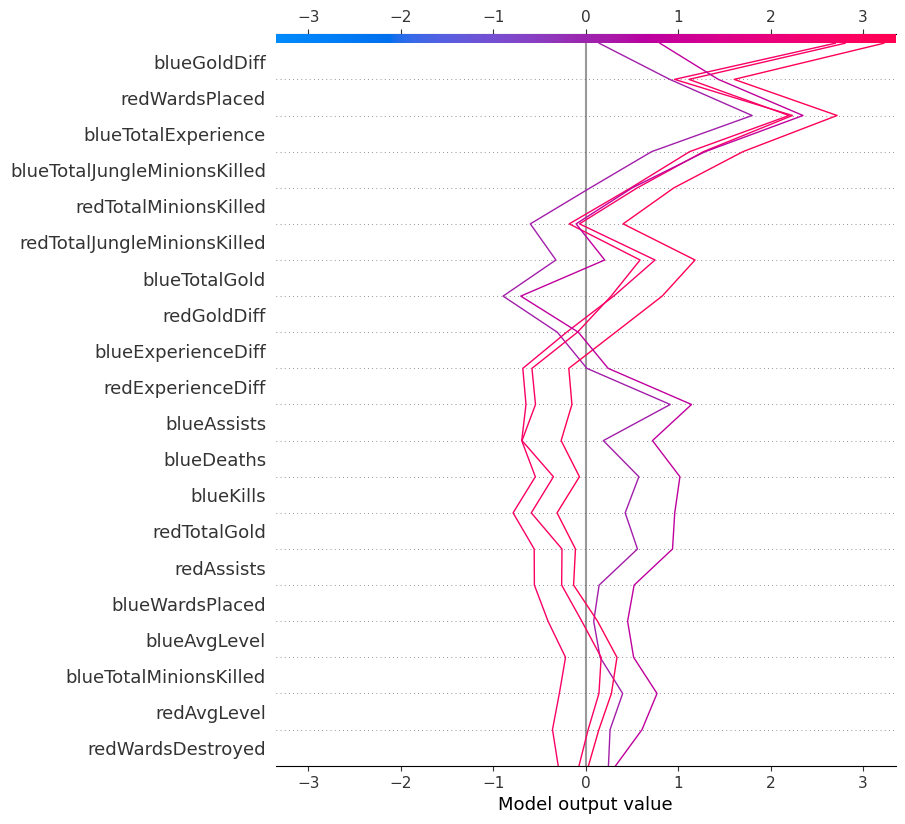

In [72]:
# Decision plot
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]

number_of_points = 5                # Set equal to 1 to see values of the features for one point
select = range(number_of_points)
features = test_X.iloc[select]
features_display = test_X.loc[features.index]

shap_values_decision_plot = explainer.shap_values(features)[:number_of_points]
shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

shap.decision_plot(expected_value, shap_values_decision_plot, features_display)

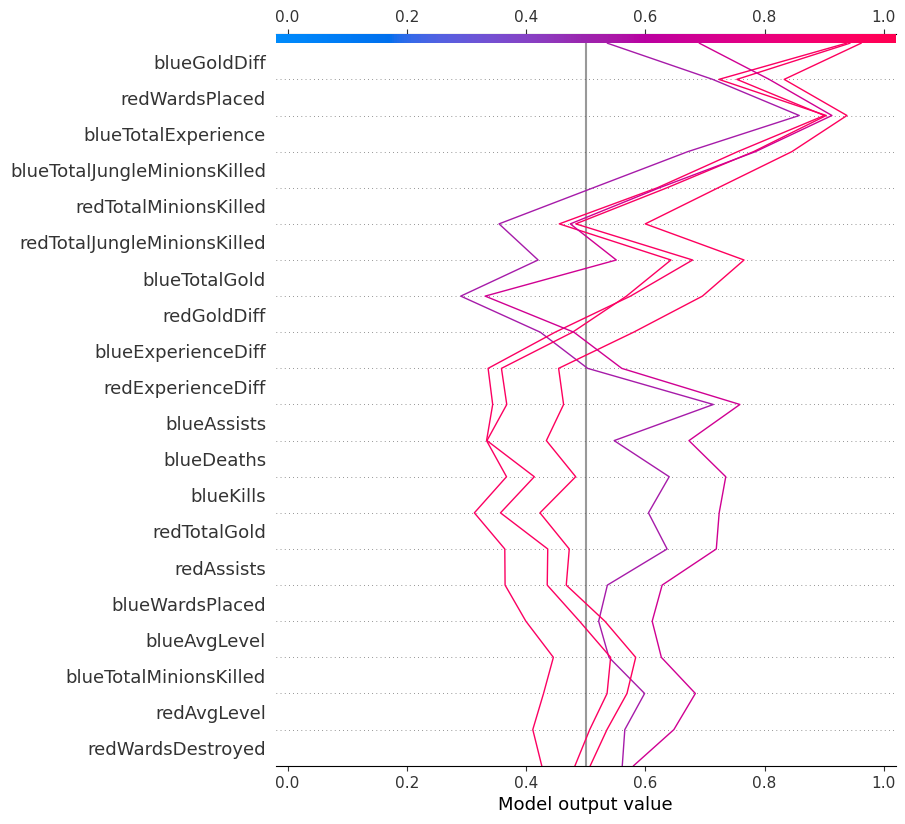

In [73]:
# Like the force plot, the decision plot supports link='logit' to transform log odds to probabilities.
shap.decision_plot(expected_value, shap_values_decision_plot, features_display, link="logit")

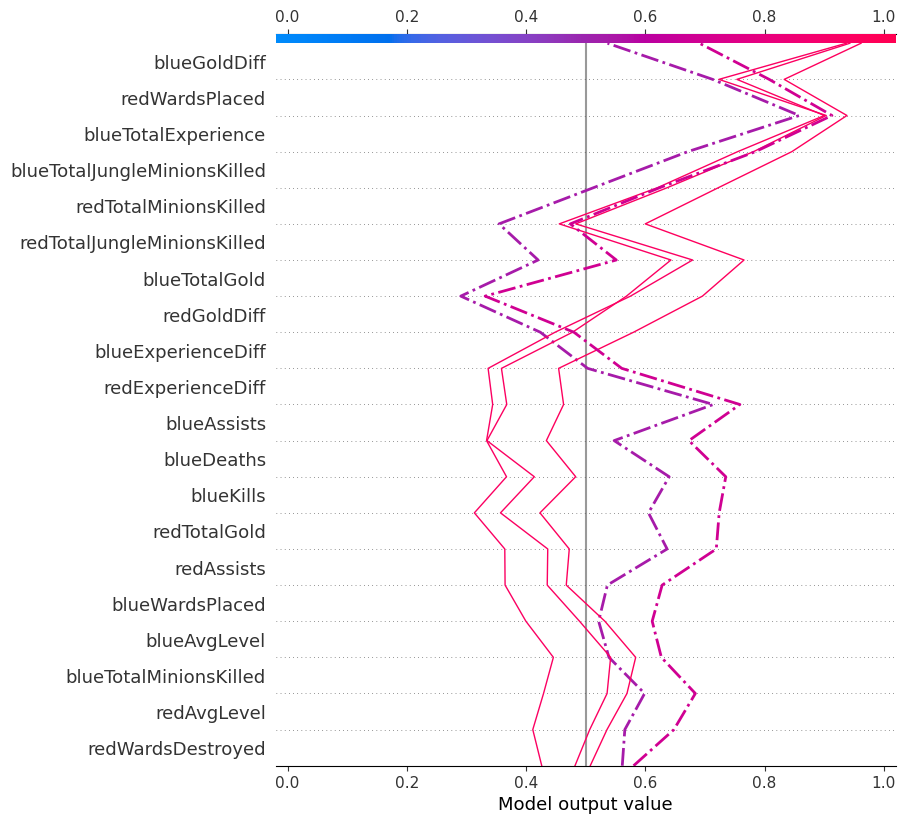

In [74]:
# Our naive cutoff point is zero log odds (probability 0.5).
y_pred = (shap_values_decision_plot.sum(1) + expected_value) > 0
misclassified = y_pred != test_y.iloc[select].values.reshape(-1)
shap.decision_plot(
    expected_value, shap_values_decision_plot, features_display, link="logit", highlight=misclassified
)

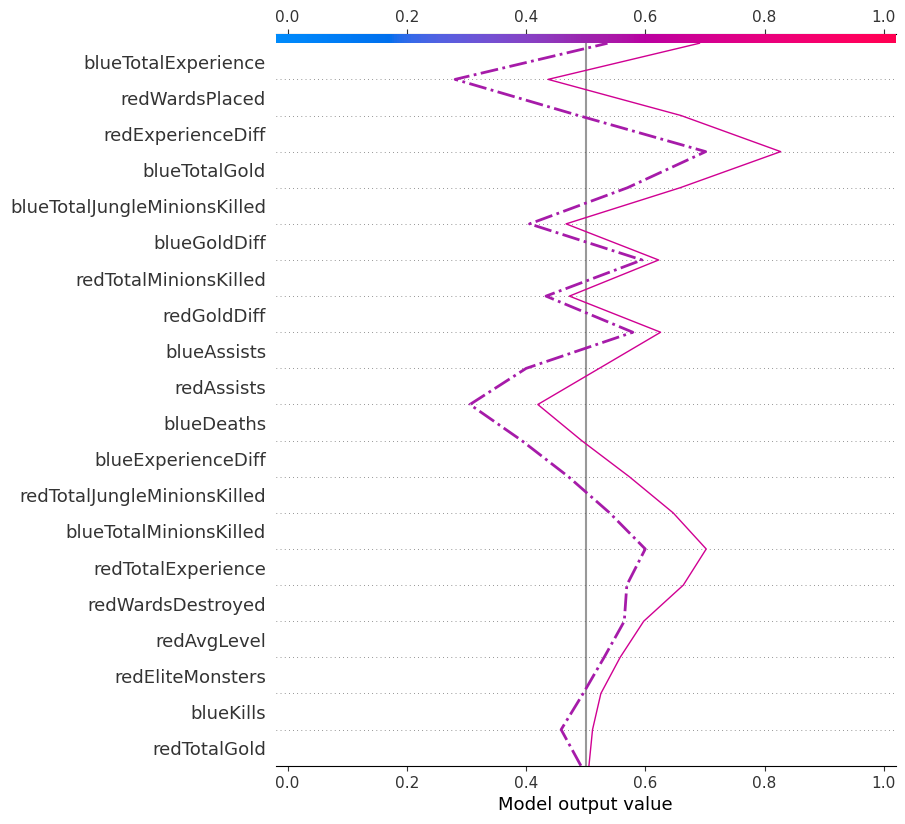

In [76]:
shap.decision_plot(
    expected_value,
    shap_values_decision_plot[misclassified],
    features_display[misclassified],
    link="logit",
    highlight=0,
)

#### Text Models

## Surrogate Models

### Decision Trees

### LIME